In [1]:
from IPython.display import Image

-----------------------------------
### LeNet implementation with Keras and MNIST dataset

- early stopping
- model saving
- loading
- prediction
---------------------------------

#### Abount LeNet

- is a classic and pioneering convolutional neural network (CNN) architecture developed by `Yann LeCun`, `Léon Bottou`, `Yoshua Bengio`, and `Patrick Haffner`. 

- It was one of the first successful CNNs and played a significant role in the development of deep learning and computer vision. 

- LeNet was primarily designed for handwritten digit recognition and was used in the famous MNIST dataset. 

**LeNet-5 Architecture:**

- Input Layer:
    - LeNet-5 takes a grayscale image as input. The original LeNet-5 architecture works with 32x32-pixel images.

- Convolutional Layers:
    - LeNet-5 consists of two sets of convolutional layers followed by max-pooling layers. These layers are responsible for learning and detecting low-level features such as edges and simple textures.

    - Convolutional Layer 1: 6 filters of size 5x5 with a ReLU activation function.

    - Max-Pooling Layer 1: 2x2 max-pooling.

    - Convolutional Layer 2: 16 filters of size 5x5 with a ReLU activation function.
    
    - Max-Pooling Layer 2: 2x2 max-pooling.

- Flatten Layer:

    - After the convolutional and max-pooling layers, the architecture has a flatten layer to convert the 2D feature maps into a 1D vector for fully connected layers.

- Fully Connected Layers:
    - LeNet-5 has 3 fully connected layers, responsible for learning high-level features and making predictions.

        - Fully Connected Layer 1: 120 neurons with a ReLU activation function.
        - Fully Connected Layer 2: 84 neurons with a ReLU activation function.
        - Output Layer: The output layer has the number of neurons equal to the number of classes in the classification problem (e.g., 10 for MNIST). It typically uses a softmax activation function for multiclass classification.
        
- Dropout (Optional):
    - In some variations, dropout layers are added to reduce overfitting.

- Output:
    - The output is a probability distribution over the classes, and the class with the highest probability is the predicted class.

#### Load MNIST Database

- 70,000 images of hand-written digits
- Images dimensions are 28x28
- Grayscale images

In [1]:
from keras.datasets import mnist
import tensorflow as tf

D:\Anaconda-16-FEB\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\Anaconda-16-FEB\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


#### Visualize the First Six Training Images

In [4]:
import matplotlib.pyplot as plt
import numpy as np

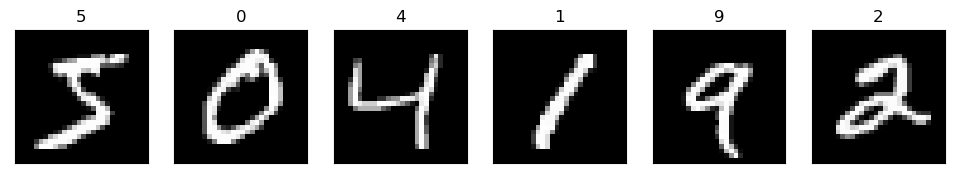

In [5]:
# plot first six training images
fig = plt.figure(figsize=(12, 5))

for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

#### View an Image in More Detail

In [6]:
np.set_printoptions(edgeitems=18, linewidth=150)

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [9]:
X_train[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [10]:
X_train[0].max()

255

In [11]:
def visualize_input(img, ax):
    
    ax.imshow(img, cmap='gray')
    
    width, height = img.shape
    
    thresh = img.max()/2.5
    
    for x in range(width):
        
        for y in range(height):
            
            ax.annotate(str(round(img[x][y], 2)), 
                        xy                 =(y,x),
                        horizontalalignment='center',
                        verticalalignment  ='center',
                        color              ='white' if img[x][y] < thresh else 'black')

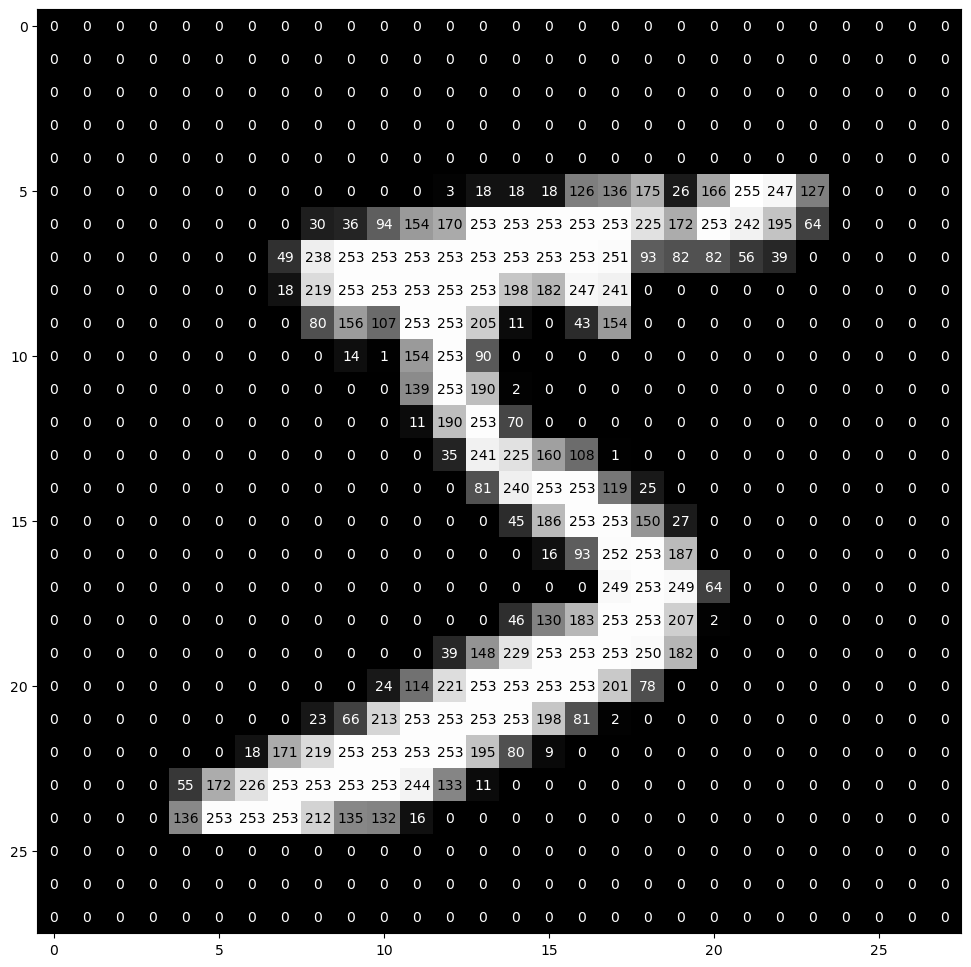

In [12]:
fig = plt.figure(figsize = (18, 12)) 

ax  = fig.add_subplot()

visualize_input(X_train[0], ax)

#### Preprocess input images: 

Rescale the Images by Dividing Every Pixel in Every Image by 255

In [13]:
# normalize the data to accelerate learning
mean = np.mean(X_train)
std  = np.std(X_train)

X_train = (X_train - mean)/(std + 1e-7)
X_test  = (X_test  - mean)/(std + 1e-7)

print('X_train shape:', X_train.shape)
print('X_test  shape:', X_test.shape)

print(X_train.shape[0], 'train samples')
print(X_test.shape[0],  'test samples')

X_train shape: (60000, 28, 28)
X_test  shape: (10000, 28, 28)
60000 train samples
10000 test samples


#### Preprocess the labels: 

Encode Categorical Integer Labels Using a One-Hot Scheme

training set

In [14]:
print('Integer-valued labels       : ', y_train[:10])
print('Unique values in the labels : ', np.unique(y_train, return_counts=True )[0])
print('counts of labels            : ', np.unique(y_train, return_counts=True )[1])

Integer-valued labels       :  [5 0 4 1 9 2 1 3 1 4]
Unique values in the labels :  [0 1 2 3 4 5 6 7 8 9]
counts of labels            :  [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


testing set

In [15]:
print('Integer-valued labels       : ', y_test[:10])
print('Unique values in the labels : ', np.unique(y_test, return_counts=True )[0])
print('counts of labels            : ', np.unique(y_test, return_counts=True )[1])

Integer-valued labels       :  [7 2 1 0 4 1 4 9 5 9]
Unique values in the labels :  [0 1 2 3 4 5 6 7 8 9]
counts of labels            :  [ 980 1135 1032 1010  982  892  958 1028  974 1009]


- one-hot `encode` the labels
- convert `class vectors` to `binary class matrices`

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
num_classes = 10 

In [18]:
y_train = to_categorical(y_train, num_classes)
y_test  = to_categorical(y_test,  num_classes)

print first ten (one-hot) training labels

In [19]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
y_test[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

#### Reshape data to fit our CNN (and input_shape)

In [21]:
# input image dimensions 28x28 pixel images. 
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test  = X_test.reshape(X_test.shape[0],   img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

print('image input shape: ', input_shape)
print('x_train shape:', X_train.shape)

image input shape:  (28, 28, 1)
x_train shape: (60000, 28, 28, 1)


##### model architecture

Original paper : http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

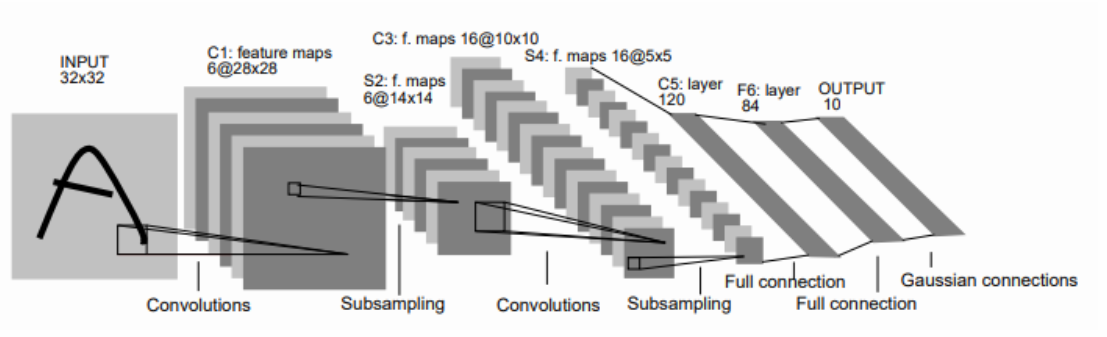

Here are the main takeaways to build the LeNet-5 network:

- Number of `filters` in each CONV layer: the depth (number of filters) of each convolutional layer is as follows: 
    - C1 = 6, 
    - C3 = 16, 
    - C5 = 120 layers.
    
- `Kernel` size of each CONV layer: from the paper, the kernel_size is = 5 x 5

- A subsampling layer (POOL) is added after each convolutional layer. 
    - The receptive field of each unit is a 2 x 2 area (i.e. pool_size = 2). 
    - Note that the LeNet-5 creators used `average pooling` which computes the average value of its inputs instead of the max pooling layer 

- `Activation` function: the creators of LeNet-5 used `tanh` activation function for the hidden layers because symmetric functions are believed to yield faster convergence compared to `sigmoid` functions. 

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

In [23]:
#Instantiate an empty model
model = Sequential()

# C1 Convolutional Layer
model.add(Conv2D(6, 
                 kernel_size=(5, 5), 
                 strides=(1, 1), 
                 activation='tanh', 
                 input_shape=input_shape, 
                 padding='same'))

# S2 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# C3 Convolutional Layer
model.add(Conv2D(16, 
                 kernel_size=(5, 5), 
                 strides=(1, 1), 
                 activation='tanh', 
                 padding='valid'))

# S4 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# C5 Fully Connected Convolutional Layer
model.add(Conv2D(120, 
                 kernel_size=(5, 5), 
                 strides=(1, 1), 
                 activation='tanh', 
                 padding='valid'))

#Flatten the CNN output so that we can connect it with fully connected layers
model.add(Flatten())

# FC6 Fully Connected Layer
model.add(Dense(84, activation='tanh'))

# Output Layer with softmax activation
model.add(Dense(10, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

#### Compile the Model
- we will use `Adam` optimizer
- the loss function is `categorical cross entropy` since we have multiple classes (10) 

In [24]:
# compile the model by defining the loss function, optimizer, and performance metric
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

#### Train the Model

- `LeCun` and his team used scheduled `decay` learning where the value of the learning rate was decreased using the following schedule: 
    - 0.0005 for the first two epochs, 
    - 0.0002 for the next three epochs, 
    - 0.00005 for the next four, and 
    - then 0.00001 thereafter. 
- In the paper, the authors trained their network for 20 epochs.

In [25]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [27]:
# set the learning rate schedule as created in the original paper
def lr_schedule(epoch):
    if epoch <= 2:     
        lr = 5e-4
    elif epoch > 2 and epoch <= 5:
        lr = 2e-4
    elif epoch > 5 and epoch <= 9:
        lr = 5e-5
    else: 
        lr = 1e-5
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# set the checkpointer
checkpointer = ModelCheckpoint(filepath='lenet.model.weights.best.hdf5', 
                               verbose=1, 
                               save_best_only=True)

In [ ]:
# train the model
hist = model.fit(X_train, 
                 y_train, 
                 batch_size=32, 
                 epochs=20,
                 validation_data=(X_test, y_test), 
                 callbacks=[checkpointer, lr_scheduler], 
                 verbose=2, 
                 shuffle=True)

Epoch 1/20

Epoch 1: val_loss improved from inf to 0.07540, saving model to lenet.model.weights.best.hdf5
1875/1875 - 30s - loss: 0.2210 - accuracy: 0.9371 - val_loss: 0.0754 - val_accuracy: 0.9767 - lr: 5.0000e-04 - 30s/epoch - 16ms/step
Epoch 2/20

Epoch 2: val_loss improved from 0.07540 to 0.04846, saving model to lenet.model.weights.best.hdf5
1875/1875 - 35s - loss: 0.0714 - accuracy: 0.9781 - val_loss: 0.0485 - val_accuracy: 0.9850 - lr: 5.0000e-04 - 35s/epoch - 18ms/step
Epoch 3/20

Epoch 3: val_loss improved from 0.04846 to 0.04471, saving model to lenet.model.weights.best.hdf5
1875/1875 - 44s - loss: 0.0507 - accuracy: 0.9843 - val_loss: 0.0447 - val_accuracy: 0.9852 - lr: 5.0000e-04 - 44s/epoch - 23ms/step
Epoch 4/20

Epoch 4: val_loss improved from 0.04471 to 0.03381, saving model to lenet.model.weights.best.hdf5
1875/1875 - 40s - loss: 0.0319 - accuracy: 0.9902 - val_loss: 0.0338 - val_accuracy: 0.9884 - lr: 2.0000e-04 - 40s/epoch - 22ms/step
Epoch 5/20


#### Load the Model with the Best Classification Accuracy on the Validation Set

In [43]:
# load the weights that yielded the best validation accuracy
model.load_weights('lenet.model.weights.best.hdf5')

#### Calculate the Classification Accuracy on the Test Set

In [44]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 99.0300%


Text(0, 0.5, 'acc')

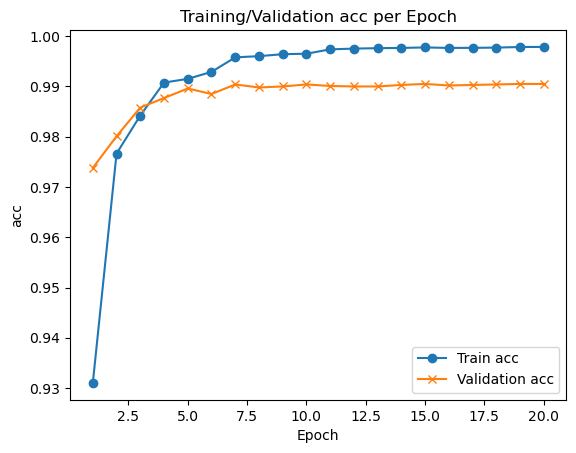

In [45]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'Loss')

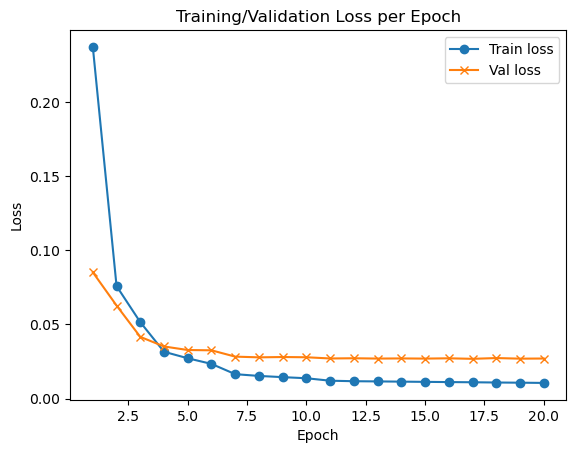

In [46]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train loss', "Val loss"], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')